# Advanced Dataframes

## Part 2 - Manipulate the dataframes
- subsetting
- indexing
- aggregrating
- combining dfs

In [1]:
import pandas as pd
import numpy as np

np.random.seed(1349)

In [2]:
# Create list of values for names column.
students = ['Sally', 
            'Jane', 
            'Suzie', 
            'Billy', 
            'Ada', 
            'John', 
            'Thomas',
            'Marie', 
            'Albert', 
            'Richard', 
            'Isaac', 
            'Alan']
# Randomly generate arrays of scores for each student for each subject.
# Note that all the values need to have the same length here.
math_grades = np.random.randint(low=60, high=100, size=len(students))
english_grades = np.random.randint(low=60, high=100, size=len(students))
reading_grades = np.random.randint(low=60, high=100, size=len(students))

# Randomly generate if a student is in classroom A or classroom B
classroom = np.random.choice(['A', 'B'], len(students))

df = pd.DataFrame({'name':students,
                   'math':math_grades,
                   'reading':reading_grades,
                   'english':english_grades,
                   'room':classroom})
df

,name,math,reading,english,room
0,Sally,78,73,84,B
1,Jane,77,98,79,B
2,Suzie,96,91,91,A
3,Billy,62,72,88,B
4,Ada,98,92,88,B
5,John,95,64,73,A
6,Thomas,87,82,80,A
7,Marie,99,94,85,A
8,Albert,91,87,77,B
9,Richard,84,94,61,A


### Subsetting

Aka pull back a subset of the dataframe 

#### pull back one column

In [3]:
# basic single bracket notation:
# returns back to us from the df dataframe,
# a single Series object
df['english']

0     84
1     79
2     91
3     88
4     88
5     73
6     80
7     85
8     77
9     61
10    91
11    87
Name: english, dtype: int64

#### pull back TWO columns

In [4]:
# two columns,
# same bracket notation,
# but we pass a list
df[['english', 'reading']] # returns a DataFrame

,english,reading
0,84,73
1,79,98
2,91,91
3,88,72
4,88,92
5,73,64
6,80,82
7,85,94
8,77,87
9,61,94


#### What's the difference between the two following outputs?

In [7]:
df[['english']].head(2)

,english
0,84
1,79


In [6]:
df['english'].head(2)

0    84
1    79
Name: english, dtype: int64

### Subsetting using boolean masking

we love boolean masking! 

1. select SINGLE column to perform conditional statment
2. perform conditional statement (should result in series of booleans!)
3. save mask
4. apply back to dataframe

#### pull back a subset of the dataframe with everyone in room B

1. select room column
2. find all rooms that are B
3. mask = all rooms that are B
4. df [mask]

In [9]:
df.columns

Index(['name', 'math', 'reading', 'english', 'room'], dtype='object')

In [11]:
# series of bools: df.room == 'B'

In [12]:
# df where all rooms are b
mask = (df.room == 'B')

In [14]:
df[mask].describe()

,math,reading,english
count,6.000000,6.000000,6.000000
mean,81.500000,80.333333,83.833333
std,12.469964,14.348054,4.792355
min,62.000000,60.000000,77.000000
25%,77.250000,72.250000,80.250000
50%,80.500000,80.000000,85.500000
75%,89.000000,90.750000,87.750000
max,98.000000,98.000000,88.000000


#### pull back a subset of the dataframe with everyone who is passing math

### using `np.where`

Return an array based on a condition
- format: `np.where(condition, output_if_TRUE, output_if_FALSE)`

#### pull back a subset of the dataframe with everyone who is passing math using `np.where`
1. create array using condition
2. attach array to df as column
3. filter on new column

In [15]:
passing_english = df.english > 70

In [17]:
# what if we want passing_english to have a label?

In [18]:
# create array based on condition
# np.where(condition, output_if_TRUE, output_if_FALSE)
np.where(df.english > 70,
         'passing',
         'failing')

array(['passing', 'passing', 'passing', 'passing', 'passing', 'passing',
       'passing', 'passing', 'passing', 'failing', 'passing', 'passing'],
      dtype='<U7')

In [19]:
#attach to df
passing_english = np.where(df.english > 70,
         'passing',
         'failing')

In [20]:
df = df.assign(english_status = passing_english)

In [23]:
df['passing_math'] = np.where(
    df['math'] > 70,
    'passing',
    'failing')

In [25]:
# make sure the condition you pass is a truth series output!
np.where(df['room'].max())

(array([0]),)

In [28]:
# df['room'] == df['room'].max()

In [22]:
#filter on new column
df[df.english_status == 'passing']

,name,math,reading,english,room,english_status
0,Sally,78,73,84,B,passing
1,Jane,77,98,79,B,passing
2,Suzie,96,91,91,A,passing
3,Billy,62,72,88,B,passing
4,Ada,98,92,88,B,passing
5,John,95,64,73,A,passing
6,Thomas,87,82,80,A,passing
7,Marie,99,94,85,A,passing
8,Albert,91,87,77,B,passing
10,Isaac,77,93,91,A,passing


## Drop passing math column

In [30]:
df.columns

Index(['name', 'math', 'reading', 'english', 'room', 'english_status',
       'passing_math'],
      dtype='object')

In [31]:
df = df.drop(columns=['passing_math', 'english_status'])

## Indexing

Pull back a subset of the dataframe using indexing

### Indexing using .loc

Using the **NAME** of the index and columns, pull back subset

- format: `df.loc[row_indexer_NAME, column_indexer_NAME]`

#### pull back row with index named `1` and column named `math`

In [32]:
df.head(1)

,name,math,reading,english,room
0,Sally,78,73,84,B


In [35]:
# df.loc will take in two things:
# row, column
# it is inclusive of both!!!
# the last element is included and not exclusive
# like basically all other python indexing
df.loc[1:4,'reading':'english']

In [ ]:
#[row,column]

In [39]:
# ineffective: df.loc[:,'english':'name']

""
0
1
2
3
4
5
6
7
8
9


In [40]:
# OK:
df.loc[1:4,['english','reading']]

,english,reading
1,79,98
2,91,91
3,88,72
4,88,92


#### pull back row `10` and column `name`

In [41]:
#[row,column]
df.loc[10, 'name']


'Isaac'

#### pull back just row `9`

In [42]:
#column name is optional
#[row]
df.loc[9]

name       Richard
math            84
reading         94
english         61
room             A
Name: 9, dtype: object

#### pull back row `5` and all rows after

In [43]:
#range of rows
#[row:]
df.loc[5:]

,name,math,reading,english,room
5,John,95,64,73,A
6,Thomas,87,82,80,A
7,Marie,99,94,85,A
8,Albert,91,87,77,B
9,Richard,84,94,61,A
10,Isaac,77,93,91,A
11,Alan,83,60,87,B


#### pull back row `5` to row `10`

In [44]:
df.loc[5:10]

,name,math,reading,english,room
5,John,95,64,73,A
6,Thomas,87,82,80,A
7,Marie,99,94,85,A
8,Albert,91,87,77,B
9,Richard,84,94,61,A
10,Isaac,77,93,91,A


#### pull back columns `math` to `english`

In [ ]:
#range of columns
#must use comma to indicate you're pulling back columns
#[row,column]
#[:,column]

#### pull back subset using a range in `loc` on both the rows and columns

In [ ]:
#[row:row, column:column]

### Indexing using .iloc

Using the **POSITION** of the index and columns, pull back subset

- format: `df.iloc[row_indexer_POSITION, column_indexer_POSITION]`

#### pull back subset skipping the first row

In [46]:
df.columns

Index(['name', 'math', 'reading', 'english', 'room'], dtype='object')

In [45]:
df.iloc[3:10, 1:3]

,math,reading
3,62,72
4,98,92
5,95,64
6,87,82
7,99,94
8,91,87
9,84,94


In [47]:
#[row]
df.iloc[9]

name       Richard
math            84
reading         94
english         61
room             A
Name: 9, dtype: object

#### pull back subset skipping the first column

In [48]:
#[:,column]
df.iloc[:,3]

0     84
1     79
2     91
3     88
4     88
5     73
6     80
7     85
8     77
9     61
10    91
11    87
Name: english, dtype: int64

#### pull back subset using a range in `iloc` on both the rows and columns

In [ ]:
#[row:row,column:column]

#### pull back first column using iloc

In [49]:
df.iloc[:,0]

0       Sally
1        Jane
2       Suzie
3       Billy
4         Ada
5        John
6      Thomas
7       Marie
8      Albert
9     Richard
10      Isaac
11       Alan
Name: name, dtype: object

### summary of `.loc` and `.iloc`

- `.loc`: takes the NAME of the row and column index
- `.iloc`: takes the POSITION of the row and column index


- both format: `[row:row, column:column]`

## Aggregating

### `.agg` method 

- lets us specify a way to aggregate a series of numerical values

In [50]:
df.agg('max')

name       Thomas
math           99
reading        98
english        91
room            B
dtype: object

#### find the min math score

In [51]:
df.math.agg('min')

62

#### find the min and max math score

In [52]:
df.math.agg(['min','max'])

min    62
max    99
Name: math, dtype: int64

In [54]:
#contain multiple agg functions in a list
df.agg(['min','max','mean'])

TypeError: Could not convert SallyJaneSuzieBillyAdaJohnThomasMarieAlbertRichardIsaacAlan to numeric

#### find the min, max, and average scores of all subjects

In [55]:
df[['math','reading','english']].agg([
    'mean', 'min', 'max'])

,math,reading,english
mean,85.583333,83.333333,82.0
min,62.000000,60.000000,61.0
max,99.000000,98.000000,91.0


In [56]:
df.describe()

,math,reading,english
count,12.000000,12.000000,12.000000
mean,85.583333,83.333333,82.000000
std,11.007917,12.928709,8.696917
min,62.000000,60.000000,61.000000
25%,77.750000,72.750000,78.500000
50%,85.500000,89.000000,84.500000
75%,95.250000,93.250000,88.000000
max,99.000000,98.000000,91.000000


### `.groupby` function
- used for grouping the data according to the categories and apply a function to the categories

In [59]:
df.groupby('room').agg(['min','max'])

name         math     reading     english    
        min     max  min max     min max     min max
room                                                
A     Isaac  Thomas   77  99      64  94      61  91
B       Ada   Sally   62  98      60  98      77  88

In [61]:
df.groupby('room').describe().T

room                   A          B
math    count   6.000000   6.000000
        mean   89.666667  81.500000
        std     8.430105  12.469964
        min    77.000000  62.000000
        25%    84.750000  77.250000
        50%    91.000000  80.500000
        75%    95.750000  89.000000
        max    99.000000  98.000000
reading count   6.000000   6.000000
        mean   86.333333  80.333333
        std    11.843423  14.348054
        min    64.000000  60.000000
        25%    84.250000  72.250000
        50%    92.000000  80.000000
        75%    93.750000  90.750000
        max    94.000000  98.000000
english count   6.000000   6.000000
        mean   80.166667  83.833333
        std    11.634718   4.792355
        min    61.000000  77.000000
        25%    74.750000  80.250000
        50%    82.500000  85.500000
        75%    89.500000  87.750000
        max    91.000000  88.000000

#### `groupby` room column

> what does this output mean?

#### find max scores by room using `groupby`

format: `df.groupby('column_name').agg_function()`

#### specifiy subjects only

In [62]:
# i can specify multiple fields by
# passing a list of fields into brackets like
# i was doing previously.
# i can then chain a max, agg, or whatever function
# that works in conjunction with the aggregate
df.groupby('room')[['reading','english']].max()

,reading,english
room,,
A,94,91
B,98,88


#### can also combine with `agg` 

In [63]:
df.groupby('room')[['reading','english']].agg(
    ['max', 'mean', 'min'])

reading                english               
         max       mean min     max       mean min
room                                              
A         94  86.333333  64      91  80.166667  61
B         98  80.333333  60      88  83.833333  77

In [88]:
df.groupby('room')[['reading','english']].agg(
    ['max', 'mean', 'min'])

reading                english               
         max       mean min     max       mean min
room                                              
A         94  86.333333  64      91  80.166667  61
B         98  80.333333  60      88  83.833333  77

In [91]:
# pd.DataFrame.transform?

In [95]:
len(df.groupby('room').math.transform('mean'))

12

In [97]:
df.groupby('room').math.transform('mean')

0     81.500000
1     81.500000
2     89.666667
3     81.500000
4     81.500000
5     89.666667
6     89.666667
7     89.666667
8     81.500000
9     89.666667
10    89.666667
11    81.500000
Name: math, dtype: float64

In [103]:
df.groupby('room'
          )[
    ['math', 'reading']
].transform('mean'
           ).rename(
    columns={'math':'math_avg',
             'reading':'reading_avg'}
)

,math_avg,reading_avg
0,81.500000,80.333333
1,81.500000,80.333333
2,89.666667,86.333333
3,81.500000,80.333333
4,81.500000,80.333333
5,89.666667,86.333333
6,89.666667,86.333333
7,89.666667,86.333333
8,81.500000,80.333333
9,89.666667,86.333333


In [97]:
df.groupby('room').math.transform('mean')

0     81.500000
1     81.500000
2     89.666667
3     81.500000
4     81.500000
5     89.666667
6     89.666667
7     89.666667
8     81.500000
9     89.666667
10    89.666667
11    81.500000
Name: math, dtype: float64

In [ ]:
# how would I use this to calculate the difference
# between each students current math grade and the average 
# math grade?

In [99]:
df['math_diff_from_avg'] = \
df['math'] - df.groupby('room').math.transform('mean')

In [100]:
# this method works if we want to compare for overall
# but does not account for comparing students
# against their specific classroom peers!
df['math'] - df.math.mean()

0     -7.583333
1     -8.583333
2     10.416667
3    -23.583333
4     12.416667
5      9.416667
6      1.416667
7     13.416667
8      5.416667
9     -1.583333
10    -8.583333
11    -2.583333
Name: math, dtype: float64

In [96]:
df.groupby('room').math.agg('mean')

room
A    89.666667
B    81.500000
Name: math, dtype: float64

## Combining dataframes

How we combine dataframes together

### `pd.concat`

- adds two dataframes
- adds them along either axis
    - row-wise (axis=0) aka on top of each other 
    - column-wise (axis=1) aka next to each other
- intial dataframes are completely intact afterwards
    
 
format: `pd.concat([df1,df2], axis=#)`

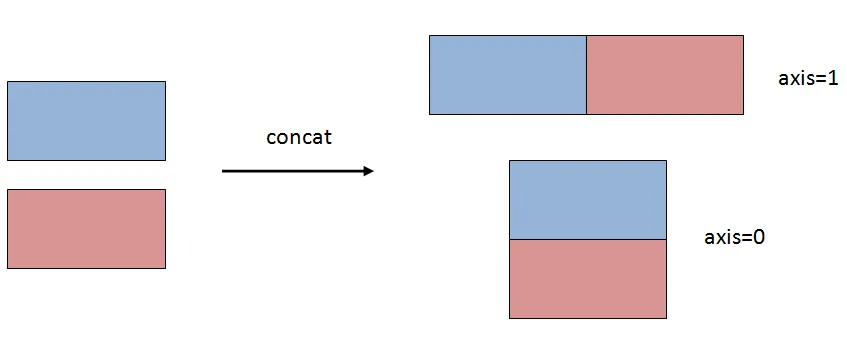

In [76]:
df1 = pd.DataFrame({'col1': [1, 6, 3], 'col2': [6, 9, 20]})
df1

,col1,col2
0,1,6
1,6,9
2,3,20


In [77]:
df2 = pd.DataFrame({'col1': [89, 76, 24], 'col2': [110111, 11101, 10900]})
df2

,col1,col2
0,89,110111
1,76,11101
2,24,10900


#### concat two dfs row-wise (keep all the rows)

In [71]:
pd.concat([df1,df2], axis=0)

,col1,col2
0,1,6
1,6,9
2,3,20
0,89,110111
1,76,11101
2,24,10900


In [67]:
pd.concat([df1,df2], axis=0, ignore_index=True)

,col1,col2
0,1,6
1,6,9
2,3,20
3,89,110111
4,76,11101
5,24,10900


#### concat two dfs column-wise (keep all the columns)

In [74]:
# note that we have repeated column names here
pd.concat([df1,df2], axis=1)

,col1,col2,col1,col2
0,1,6,89,110111
1,6,9,76,11101
2,3,20,24,10900


In [ ]:
# rows: r0ws, cols: co1s

In [104]:
math_and_reading_by_classroom = df.groupby('room'
          )[
    ['math', 'reading']
].transform('mean'
           ).rename(
    columns={'math':'math_avg',
             'reading':'reading_avg'}
)

In [105]:
pd.concat(
    [df, math_and_reading_by_classroom]
    , axis=1)

,name,math,reading,english,room,math_diff_from_avg,math_avg,reading_avg
0,Sally,78,73,84,B,-3.500000,81.500000,80.333333
1,Jane,77,98,79,B,-4.500000,81.500000,80.333333
2,Suzie,96,91,91,A,6.333333,89.666667,86.333333
3,Billy,62,72,88,B,-19.500000,81.500000,80.333333
4,Ada,98,92,88,B,16.500000,81.500000,80.333333
5,John,95,64,73,A,5.333333,89.666667,86.333333
6,Thomas,87,82,80,A,-2.666667,89.666667,86.333333
7,Marie,99,94,85,A,9.333333,89.666667,86.333333
8,Albert,91,87,77,B,9.500000,81.500000,80.333333
9,Richard,84,94,61,A,-5.666667,89.666667,86.333333


### `pd.merge`

- combines two dataframes like a SQL join    
 
format: `pd.merge(df1,df2, how='', on='column_name')`

In [80]:
# pd.DataFrame.merge?

In [81]:
# pd.merge?

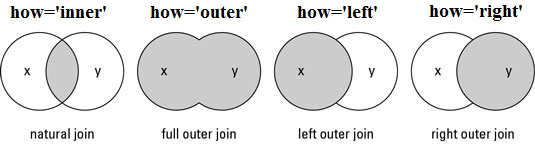

In [82]:
# Create the users DataFrame
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [83]:
# Create the roles DataFrame
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


#### merge dfs on the role id

In [84]:
# pd.merge(df1,df2, how='', on='column_name')
pd.merge(users,
         roles,
         how='inner',
         left_on=users.role_id,
         right_on=roles.id)

,key_0,id_x,name_x,role_id,id_y,name_y
0,1.0,1,bob,1.0,1,admin
1,2.0,2,joe,2.0,2,author
2,3.0,3,sally,3.0,3,reviewer
3,3.0,4,adam,3.0,3,reviewer


In [106]:
pd.merge?

Signature:
pd.merge(
    left: 'DataFrame | Series',
    right: 'DataFrame | Series',
    how: 'MergeHow' = 'inner',
    on: 'IndexLabel | None' = None,
    left_on: 'IndexLabel | None' = None,
    right_on: 'IndexLabel | None' = None,
    left_index: 'bool' = False,
    right_index: 'bool' = False,
    sort: 'bool' = False,
    suffixes: 'Suffixes' = ('_x', '_y'),
    copy: 'bool | None' = None,
    indicator: 'str | bool' = False,
    validate: 'str | None' = None,
) -> 'DataFrame'
Docstring:
Merge DataFrame or named Series objects with a database-style join.

A named Series object is treated as a DataFrame with a single named column.

The join is done on columns or indexes. If joining columns on
columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
on indexes or indexes on a column or columns, the index will be passed on.
When performing a cross merge, no column specifications to merge on are
allowed.

.. warning::

    If both key columns contain rows where

In [86]:
#indicator argument shows where the data is coming from in merge
pd.merge(users,
         roles,
         how='outer',
         left_on=users.role_id,
         right_on=roles.id,
        indicator=True,
)

,key_0,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,1.0,bob,1.0,1.0,admin,both
1,2.0,2.0,joe,2.0,2.0,author,both
2,3.0,3.0,sally,3.0,3.0,reviewer,both
3,3.0,4.0,adam,3.0,3.0,reviewer,both
4,NaN,5.0,jane,NaN,NaN,NaN,left_only
5,NaN,6.0,mike,NaN,NaN,NaN,left_only
6,4.0,NaN,NaN,NaN,4.0,commenter,right_only


#### merge again dfs on the role id

In [87]:
users.merge(roles,
            left_on=users.role_id,
            right_on=roles.id,
            how='left')

,key_0,id_x,name_x,role_id,id_y,name_y
0,1.0,1,bob,1.0,1.0,admin
1,2.0,2,joe,2.0,2.0,author
2,3.0,3,sally,3.0,3.0,reviewer
3,3.0,4,adam,3.0,3.0,reviewer
4,NaN,5,jane,NaN,NaN,NaN
5,NaN,6,mike,NaN,NaN,NaN


**note:** use pd.merge() over df.join(), because pd.merge() has more capabilities